## Preface



In [1]:
!pip install -r requirements.txt
import cfe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

r = cfe.result.from_dataset('./bengali_t_2.ds',engine='netcdf4')
UseNutrients=['Protein','Calories','Iron']

# Reference period, market
t,m = 1,1

# Reference budget (find mean in reference period & market):
reference_x = r.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)

p = r.prices.sel(t=t,m=m,drop=True)
p = p.to_dataframe('i').squeeze().dropna()
p

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached numpy-1.22.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached pandas-1.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: plotly
    Found existing installatio

i
apple                         104.693121
arhar (tur)                    98.678479
banana                         17.112447
besan                          46.824860
black pepper                  345.478186
                                 ...    
tomato                         21.596503
turmeric                      185.630514
urd                            71.913813
wheat/atta - P.D.S.             6.692056
wheat/atta - other sources     22.154218
Name: i, Length: 77, dtype: float64

## Nutritional requirements



Individuals have nutritional requirements established by nutrition
scientists.  Here are some standards established by the Indian
National Institute of Nutrition:



### Nutritional Needs of individuals



#### Recommended Daily Allowances: India



| Sex-Age|Calories|Protein|Fat|Calcium|Iron|Betacarotene|Thiamine|Riboflavin|Niacin|Ascorbic Acid|
|---|---|---|---|---|---|---|---|---|---|---|
| C 0-0.5||||500|||.2|.3||25|
| C 0.5-1|||19|500|5|2800|.3|.4||25|
| C 1-3|1060|16.7|27|600|9|3200|.5|.6|8|40|
| C 4-6|1350|20.1|25|600|13|3200|.7|.8|11|40|
| C 7-9|1690|29.5|30|600|16|4800|.8|1.|13|40|
| B 10-12|2190|39.9|35|800|21|4800|1.1|1.3|15|40|
| G 10-12|2010|40.4|35|800|27|4800|1.|1.2|13|40|
| B 13-15|2750|54.3|45|800|32|4800|1.4|1.6|16|40|
| G 13-15|2330|51.9|40|800|27|4800|1.2|1.4|14|40|
| B 16-17|3020|61.5|50|800|28|4800|1.5|1.8|17|40|
| G 16-17|2440|55.5|35|800|26|4800|1.|1.2|14|40|
| M|2730|60|30|600|17|4800|1.4|1.4|18|40|
| W|2230|55|25|1200|21|4800|1.1|1.3|14|40|



### Nutritional Needs of Households



Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For the average household in the ICRISAT villages, the number of
different kinds of people can be computed by averaging over households:



In [2]:
# In first round, averaged over households and villages

zbar = r.z.sel(t=r.firstround,drop=True).mean(['j','m'])[:-1].squeeze() # Leave out log HSize

zbar = zbar.to_dataframe().squeeze()
zbar.sum()

4.105146476642914

Now, the inner/dot/matrix product between `zbar` and the `rda`
DataFrame of requirements will give us minimum requirements for the
average household:



In [3]:
DRIs = pd.read_csv('Dietary Requirements - diet_minimums.csv')
# Define *minimums*
diet_min = DRIs.set_index('Nutrition')
diet_min

,Source,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,,
Energy,---,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,RDA,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",---,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",RDA,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",RDA,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
"Carbohydrate, by difference",RDA,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",RDA,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
"Magnesium, Mg",RDA,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,RDA,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


In [4]:
new_df = pd.DataFrame(index = diet_min.index)
new_df['Males 0-1'] =  diet_min['C 1-3'].to_list()
new_df['Females 0-1'] = diet_min['C 1-3'].to_list()
new_df['Males 1-5'] =  (np.array(diet_min['C 1-3']) + np.array(diet_min['M 4-8'])) / 2
new_df['Females 1-5'] =  (np.array(diet_min['C 1-3']) + np.array(diet_min['F 4-8'])) / 2
new_df['Males 5-10'] =  (np.array(diet_min['M 4-8']) + np.array(diet_min['M 9-13'])) / 2
new_df['Females 5-10'] =  (np.array(diet_min['M 4-8']) + np.array(diet_min['M 9-13'])) / 2
new_df['Males 10-15'] =  (np.array(diet_min['M 9-13']) + np.array(diet_min['M 14-18'])) / 2
new_df['Females 10-15'] =  (np.array(diet_min['F 9-13']) + np.array(diet_min['F 14-18'])) / 2
new_df['Males 15-20'] =  np.array(diet_min['M 14-18'])
new_df['Females 15-20'] =  np.array(diet_min['F 14-18'])
new_df['Males 20-30'] =  np.array(diet_min['M 19-30'])
new_df['Females 20-30'] =  np.array(diet_min['F 19-30'])
new_df['Males 30-50'] =  np.array(diet_min['M 31-50'])
new_df['Females 30-50'] =  np.array(diet_min['F 31-50'])
new_df['Males 50-60'] =  np.array(diet_min['M 51+'])
new_df['Males 60-100'] =  np.array(diet_min['M 51+'])
new_df['Females 50-60'] =  np.array(diet_min['F 51+'])
new_df['Females 60-100'] =  np.array(diet_min['F 51+'])
rda = new_df


In [5]:
#check if all age-sex range is label correctly in rda and zbar
rda.columns.difference(zbar.index)

Index([], dtype='object')

In [6]:
# May need to tweak types or alignment to match RDA and zbar types:
rda0,zbar0=rda.align(zbar,axis=1)

# This matrix product gives minimum nutrient requirements for average
# household 
hh_rda = rda0.replace('',0)@zbar0

# RDA is /daily/, but  demands in our data are /monthly/:
hh_rda = hh_rda*30
hh_rda

Nutrition
Energy                            233313.539192
Protein                             5611.646081
Fiber, total dietary                3266.389549
Folate, DFE                        45267.339667
Calcium, Ca                       132438.954869
Carbohydrate, by difference        16010.071259
Iron, Fe                            1374.957245
Magnesium, Mg                      40705.961995
Niacin                              1713.244656
Phosphorus, P                      98840.593824
Potassium, K                      560811.163895
Riboflavin                           135.364608
Thiamin                              130.338242
Vitamin A, RAE                     90688.598575
Vitamin B-12                         271.604038
Vitamin B-6                          153.304988
Vitamin C, total ascorbic acid      8730.047506
Vitamin E (alpha-tocopherol)        1692.287411
Vitamin K (phylloquinone)          11145.581948
Zinc, Zn                            1094.605701
dtype: float64

## Nutritional Adequacy of Food Demands



### Food Conversion Table



As usual, we need data to convert foods to nutrients:



In [7]:
fdc_codes = pd.read_csv('proj_4_fdc_codes_bengal.csv - Sheet1.csv').set_index('Item')
fdc_codes = fdc_codes.reset_index()
fdc_codes

,Item,ID
0,apple,1102644
1,arhar (tur),1977550
2,banana,1102653
3,besan,2091506
4,black pepper,170931
...,...,...
63,tea; leaf,1104262
64,tomato,1103276
65,turmeric,172231
66,urd,1898206


In [8]:
import fooddatacentral as fdc

apikey = 'CDXgPa1HVqJab8EFllem1ikOF75m2ELYwziKtICr'
D = {}
count = 0
for food in fdc_codes.Item.tolist():
    try:
        FDC = fdc_codes.loc[fdc_codes.Item==food,:].ID[count]
        count+=1
        print(FDC)
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float).fillna(0)

D

1102644
1977550
1102653
2091506
170931
1100621
2024758
1103343
1103193
1100517
1103345
2029648
170497
1648089
1100523
422335
1919204
1155520
1102631
170922
168570
1028841
2216557
1103354
1103844
1937534
175304
168448
1102665
1100536
1750348
1102666
1942595
1915741
2008520
1102594
2091229
1102670
172420
508611
1909132
1100404
1886719
172337
598232
1103364
1102597
1889171
1103153
168414
170419
1103686
1102879
1103374
1102640
2129576
2077766
173468
2031743
1103933
1126152
1102697
1104274
1104262
1103276
172231
1898206
522973


,apple,arhar (tur),banana,besan,black pepper,bread (bakery),brinjal,cabbage,carrot,cashewnut,...,"sauce, jam, jelly",sugar -other sources,"suji, rawa",tamarind,tea: cups,tea; leaf,tomato,turmeric,urd,wheat/atta - other sources
Alanine,0.00,0.0,0.00,0.0,0.616,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.33,0.0,0.0
"Alcohol, ethyl",0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Amino acids,0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Arginine,0.00,0.0,0.00,0.0,0.308,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.54,0.0,0.0
Ash,0.00,0.0,0.00,0.0,4.490,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,7.08,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Vitamin K (phylloquinone),2.20,0.0,0.50,0.0,163.700,0.20,0.0,38.20,13.20,36.80,...,0.0,0.00,0.0,2.8,0.00,0.00,7.90,13.40,0.0,0.0
Vitamins and Other Components,0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Water,85.56,0.0,74.91,0.0,12.460,35.70,0.0,90.39,88.29,1.64,...,0.0,0.02,0.0,31.4,99.70,99.93,94.52,12.85,0.0,0.0


In [10]:
fct = D.T
fct

,Alanine,"Alcohol, ethyl",Amino acids,Arginine,Ash,Aspartic acid,Beta-sitostanol,Beta-sitosterol,Betaine,Brassicasterol,...,"Vitamin D (D2 + D3), International Units",Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (Dihydrophylloquinone),Vitamin K (Menaquinone-4),Vitamin K (phylloquinone),Vitamins and Other Components,Water,"Zinc, Zn"
apple,0.000,0.0,0.0,0.000,0.00,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.18,0.0,0.0,0.0,2.2,0.0,85.56,0.04
arhar (tur),0.000,0.0,0.0,0.000,0.00,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
banana,0.000,0.0,0.0,0.000,0.00,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.10,0.0,0.0,0.0,0.5,0.0,74.91,0.15
besan,0.000,0.0,0.0,0.000,0.00,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
black pepper,0.616,0.0,0.0,0.308,4.49,1.413,0.0,0.0,8.9,0.0,...,0.0,0.0,1.04,0.0,0.0,0.0,163.7,0.0,12.46,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tea; leaf,0.000,0.0,0.0,0.000,0.00,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,99.93,0.01
tomato,0.000,0.0,0.0,0.000,0.00,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.54,0.0,0.0,0.0,7.9,0.0,94.52,0.17
turmeric,0.330,0.0,0.0,0.540,7.08,1.860,0.0,0.0,9.7,0.0,...,0.0,0.0,4.43,0.0,0.0,0.0,13.4,0.0,12.85,4.50
urd,0.000,0.0,0.0,0.000,0.00,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00


### Prices



In [11]:
def my_prices(p0,p=p,i='apple'):
    p = p.copy()
    p.loc[i] = p0
    return p

### Nutrient Demand



We can also use our demand functions to
 compute nutrition as a *function* of prices and budget.



In [12]:
import warnings 

# x is income, p is a vector of prices 
def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)
    
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

In [13]:
fct.columns.tolist()

['Alanine',
 'Alcohol, ethyl',
 'Amino acids',
 'Arginine',
 'Ash',
 'Aspartic acid',
 'Beta-sitostanol',
 'Beta-sitosterol',
 'Betaine',
 'Brassicasterol',
 'Caffeine',
 'Calcium, Ca',
 'Campestanol',
 'Campesterol',
 'Carbohydrate, by difference',
 'Carbohydrates',
 'Carotene, alpha',
 'Carotene, beta',
 'Cholesterol',
 'Choline, total',
 'Copper, Cu',
 'Cryptoxanthin, beta',
 'Cystine',
 'Delta-5-avenasterol',
 'Delta-7-Stigmastenol',
 'Energy',
 'Fatty acids, total monounsaturated',
 'Fatty acids, total polyunsaturated',
 'Fatty acids, total saturated',
 'Fatty acids, total trans',
 'Fatty acids, total trans-monoenoic',
 'Fatty acids, total trans-polyenoic',
 'Fiber, total dietary',
 'Fluoride, F',
 'Folate, DFE',
 'Folate, food',
 'Folate, total',
 'Folic acid',
 'Fructose',
 'Galactose',
 'Glucose',
 'Glutamic acid',
 'Glycine',
 'Histidine',
 'Hydroxyproline',
 'Iron, Fe',
 'Isoleucine',
 'Lactose',
 'Leucine',
 'Lipids',
 'Lutein + zeaxanthin',
 'Lycopene',
 'Lysine',
 'MUFA 12

With this `nutrient_demand` function in hand, we can see how nutrient
 outcomes vary with budget, given prices:



/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

Text(0, 0.5, 'log nutrient')

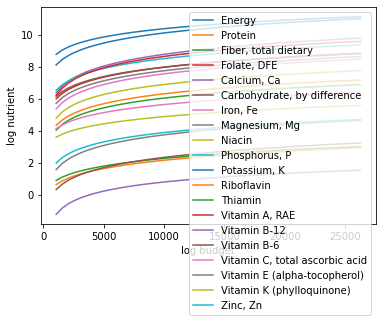

In [14]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(reference_x/5,reference_x*5,50)

UseNutrients = hh_rda.index.tolist()

df = pd.concat({myx:np.log(nutrient_demand(myx,p))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()
plt.legend(loc='upper right')

ax.set_xlabel('log budget')
ax.set_ylabel('log nutrient')

Now how does nutrition vary with prices?



In [15]:
hh_rda.index.tolist()

['Energy',
 'Protein',
 'Fiber, total dietary',
 'Folate, DFE',
 'Calcium, Ca',
 'Carbohydrate, by difference',
 'Iron, Fe',
 'Magnesium, Mg',
 'Niacin',
 'Phosphorus, P',
 'Potassium, K',
 'Riboflavin',
 'Thiamin',
 'Vitamin A, RAE',
 'Vitamin B-12',
 'Vitamin B-6',
 'Vitamin C, total ascorbic acid',
 'Vitamin E (alpha-tocopherol)',
 'Vitamin K (phylloquinone)',
 'Zinc, Zn']

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

Text(0, 0.5, 'log nutrient')

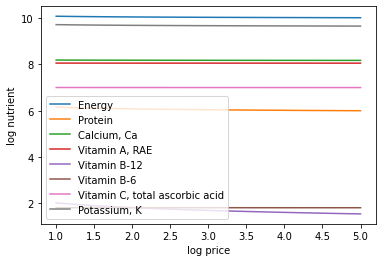

In [16]:
USE_GOOD = 'goat meat'

ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m,drop=True)

P = np.linspace(1,5,20).tolist()
KeyNutrients = ['Energy',
                'Protein',
                'Calcium, Ca',
                'Vitamin A, RAE',
 'Vitamin B-12',
 'Vitamin B-6',
 'Vitamin C, total ascorbic acid',
'Potassium, K']

ndf = pd.DataFrame({p0:np.log(nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[KeyNutrients] for p0 in P}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient')

### Nutritional Adequacy



Since we can trace out demands for nutrients as a function of $(x,p)$,
and we&rsquo;ve computed minimum nutritional requirements for the average
household, we can *normalize* nutritional intake to check the adequacy
of diet.



In [17]:
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/(hh_rda/30)

In terms of normalized nutrients, any household with more than one
unit of any given nutrient (or zero in logs) will be consuming a
minimally adequate level of the nutrient; below this level there&rsquo;s
clearly nutritional inadequacy.  For this reason the ratio of
actual nutrients to required nutrients is termed the &ldquo;nutrient
adequacy ratio,&rdquo; or NAR.



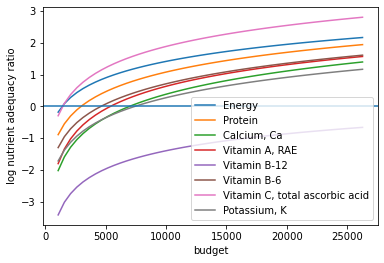

In [18]:
X = np.linspace(reference_x/5,reference_x*5,50)

ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[KeyNutrients] for x in X},axis=1).T

ax = ndf.plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)

As before, we can also vary relative prices.  Here we trace out
nutritional adequacy varying the price of a single good:



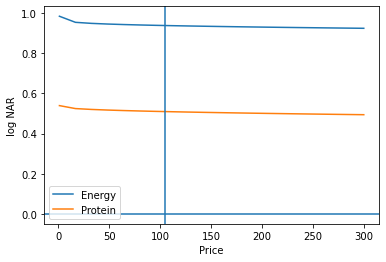

In [23]:
poorer_x = reference_x

good = 'apple'

ExNutrients = ['Energy', 'Protein']

Pscale = np.linspace(1,300,20).tolist()

log_nar = {s0:np.log(nutrient_adequacy_ratio(poorer_x,my_prices(s0,p,i=good)))[ExNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
ax.axvline(p[good])

#vertical line atural price of good 
#horizaon line: if you are above, you have adequate nutrition 

In [24]:
log_nar

,Energy,Protein
1.000000,0.983583,0.538903
16.736842,0.953323,0.524158
32.473684,0.948115,0.519894
48.210526,0.944819,0.516835
63.947368,0.942292,0.514337
79.684211,0.940191,0.512178
95.421053,0.938366,0.510252
111.157895,0.936735,0.508499
126.894737,0.935251,0.506880
142.631579,0.933882,0.505369


In [25]:
Pscale

[1.0,
 16.736842105263158,
 32.473684210526315,
 48.21052631578947,
 63.94736842105263,
 79.68421052631578,
 95.42105263157895,
 111.15789473684211,
 126.89473684210526,
 142.6315789473684,
 158.36842105263156,
 174.10526315789474,
 189.8421052631579,
 205.57894736842104,
 221.31578947368422,
 237.05263157894737,
 252.78947368421052,
 268.5263157894737,
 284.2631578947368,
 300.0]